## Step 1: Reading & Understanding Data (EDA)

#### Import libraries :

In [129]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#### Read the housing dataset :

In [130]:
# Read the housing price dataset
house = pd.read_csv("housing_price_dataset.csv")
pd.set_option('display.max_columns', None)
# Display the sample data
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [131]:
# Display no of rows & columns in the table
print(house.shape)

(1460, 81)


In [132]:
# Display the summary of the columns & data types
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [133]:
# Check if there are null values in the columns
print(house.isnull().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


In [134]:
# Display stats for house data
print(house.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

## Step 2: Data Cleaning 

#### Replace 'NA' values in categorical columns as 'None' :

In [135]:
# Replace 'NA' values by 'None'
catg_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical']
for column in catg_cols:
    house[column] = house[column].fillna('None')

In [136]:
# Check data after replacing values with None
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [137]:
# Drop columns that has data skewness more than 85% for categorical columns
def getTopValueCounts():
    col_list = []
    for col in house.select_dtypes(include=['object']):
        if house[col].value_counts().max() > 1241:
            col_list.append(col)
    return col_list

colsToRemove = getTopValueCounts()

# Drop the columns that has more skewness
house.drop(colsToRemove, axis=1, inplace=True)

#### Remove null values from Numerical columns

In [138]:
# Identify the columns that has null values
house.select_dtypes(include=['int64', 'float64']).isnull().sum()[house.select_dtypes(include=['int64', 'float64']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [139]:
# Impute the numerical column with zero value
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(0)
house['GarageYrBlt'] = house['GarageYrBlt'].astype(int)

In [140]:
# Impute null values in the categorical columns with median
house['LotFrontage'] = house['LotFrontage'].replace(np.nan, house['LotFrontage'].median())
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan, house['MasVnrArea'].median())

#### Check if Garage is new or old :

In [141]:
# Add a new column "isGarageNewOrOld" flag to determine whether Garage is old or not
# New Garage: If 'GarageYrBlt' > 2000 then value is 1
# Old Garage: If 'GarageYrBlt' > 2000 then value is 0
def calculateGarageBuiltYear(data):
    if data == 0:
        return 0
    elif data >= 1900 and data < 2000:
        return 0
    else:
        return 1

house["isGarageNewOrOld"] = house['GarageYrBlt'].apply(calculateGarageBuiltYear)

#### Calculate Age of house at the time of selling:

In [142]:
# Calculate the age of the building at the time of selling. Add a new column "remodelledAge"
def calculateRemodelledAge(row_data):
    if row_data['YearBuilt'] == row_data['YearRemodAdd']:
        return row_data['YrSold'] - row_data['YearBuilt']
    else:
        return row_data['YrSold'] - row_data['YearRemodAdd']

house["remodelledAge"] = house.apply(calculateRemodelledAge, axis=1)

#### Check if house is remodelled or not:

In [143]:
# Add a new column "isHouseRemodelled" flag to determine whether a house has been remodolled
# it was built
def checkHouseRemodelled(row_data):
    if row_data['YearBuilt'] == row_data['YearRemodAdd']:
        return 0
    elif row_data['YearBuilt'] < row_data['YearRemodAdd']:
        return 1
    else:
        return 2

house["isHouseRemodelled"] = house.apply(checkHouseRemodelled, axis=1)

In [144]:
# Display housing data after adding new columns
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,isGarageNewOrOld,remodelledAge,isHouseRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,1,5,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,0,36,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,1,8,0


In [145]:
# Drop columns which is of categorical and of no use
house.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis=1, inplace=True)

In [146]:
# Drop columns that has data skewness more than 85% for numerial columns
def getNumericalTopValueCounts():
    col_list = []
    for col in house.select_dtypes(include=['int64', 'float']):
        if house[col].value_counts().max() > 1241:
            col_list.append(col)
    return col_list

colsToRemove = getNumericalTopValueCounts()

# Drop the columns that has more skewness
house.drop(colsToRemove, axis=1, inplace=True)

house.drop(['MoSold'], axis = 1, inplace = True)

In [147]:
# Display the data after dropping the columns
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,isGarageNewOrOld,remodelledAge,isHouseRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,None,Normal,208500,1,5,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,None,Abnorml,140000,0,36,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,None,Normal,250000,1,8,0


In [148]:
# Check if there is any null columns present in the house data
house.isnull().sum()

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
LotShape             0
LotConfig            0
Neighborhood         0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
RoofStyle            0
Exterior1st          0
Exterior2nd          0
MasVnrType           0
MasVnrArea           0
ExterQual            0
Foundation           0
BsmtQual             0
BsmtExposure         0
BsmtFinType1         0
BsmtFinSF1           0
BsmtUnfSF            0
TotalBsmtSF          0
HeatingQC            0
1stFlrSF             0
2ndFlrSF             0
GrLivArea            0
BsmtFullBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenQual          0
TotRmsAbvGrd         0
Fireplaces           0
FireplaceQu          0
GarageType           0
GarageFinish         0
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
Fence      

#### Note: By looking at above, we could see that there is no null values

### Check for Duplicate records :

In [149]:
house[house.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,isGarageNewOrOld,remodelledAge,isHouseRemodelled


##### Note: By looking at above, we could see that there is no duplicate records

### Find Outliers using Plots :

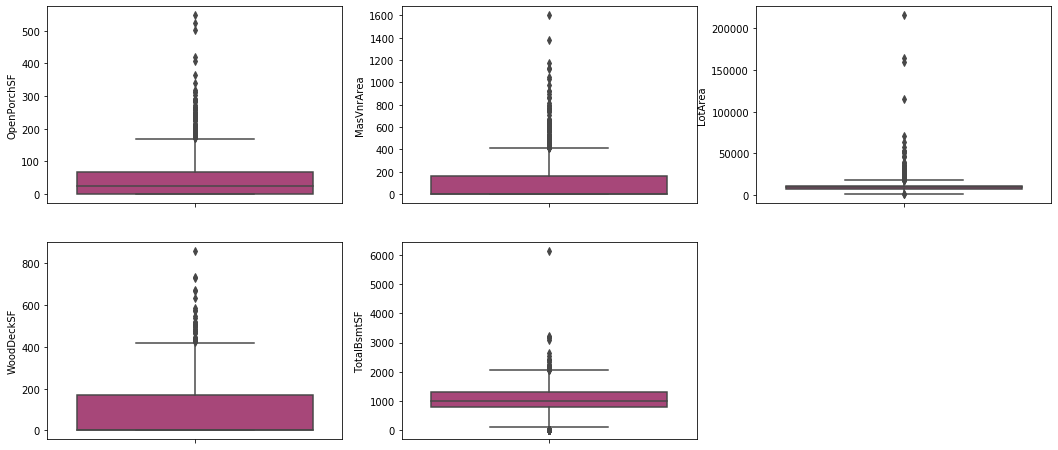

In [150]:
# Check the outliers for numerical columns using Box plot
plt.figure(figsize=(18, 21))
plt.subplot(5,3,1)
sns.boxplot(y = 'OpenPorchSF', palette='magma', data = house)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='magma', data = house)
plt.subplot(5,3,3)
sns.boxplot(y = 'LotArea', palette='magma', data = house)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='magma', data = house)
plt.subplot(5,3,5)
sns.boxplot(y = 'TotalBsmtSF', palette='magma', data = house)
plt.show()

##### Note: By looking at the Box plot, we can see that there are outliers presents and can be removed

### Remove the Outliers :

In [151]:
# Remove 99% outlier data for TotalBsmtSF
house  = house[house['TotalBsmtSF'] < (house['TotalBsmtSF'].quantile(.99))]

# Remove 99% outlier data for WoodDeckSF
house  = house[house['WoodDeckSF'] < (house['WoodDeckSF'].quantile(.99))]

# Remove 99% outlier data for OpenPorchSF
house  = house[house['OpenPorchSF'] < (house['OpenPorchSF'].quantile(.99))]

# Remove 98% outlier data for MasVnrArea
house  = house[house['MasVnrArea'] < (house['MasVnrArea'].quantile(.98))]

# Remove 98% outlier data for LotArea
house  = house[house['LotArea'] < (house['LotArea'].quantile(.98))]

In [152]:
# Data Retained after dropping outlier data
(100*len(house) / 1460)

93.01369863013699

## Step 3: Visualize Data 

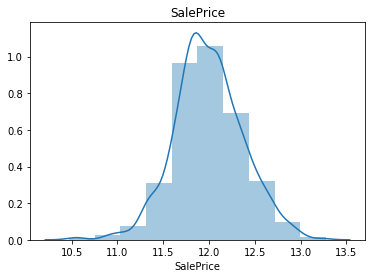

In [153]:
# Convert the 'SalePrice' into scalable format
house['SalePrice'] = np.log1p(house['SalePrice'])
plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

<Figure size 720x504 with 0 Axes>

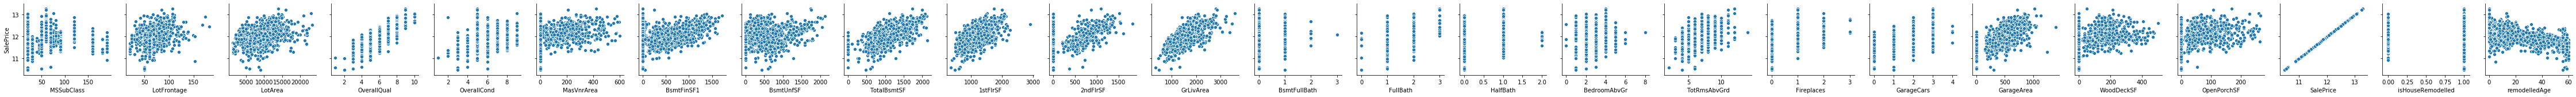

In [154]:
x_var_list = ['MSSubClass','LotFrontage','LotArea', 'OverallQual', 'OverallCond','MasVnrArea',
             'BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
             'BsmtFullBath','FullBath', 'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces',
             'GarageCars','GarageArea', 'WoodDeckSF', 'OpenPorchSF','SalePrice', 'isHouseRemodelled',
             'remodelledAge']
plt.figure(figsize=(10,7))
sns.pairplot(house, x_vars=x_var_list, y_vars='SalePrice')
plt.show()

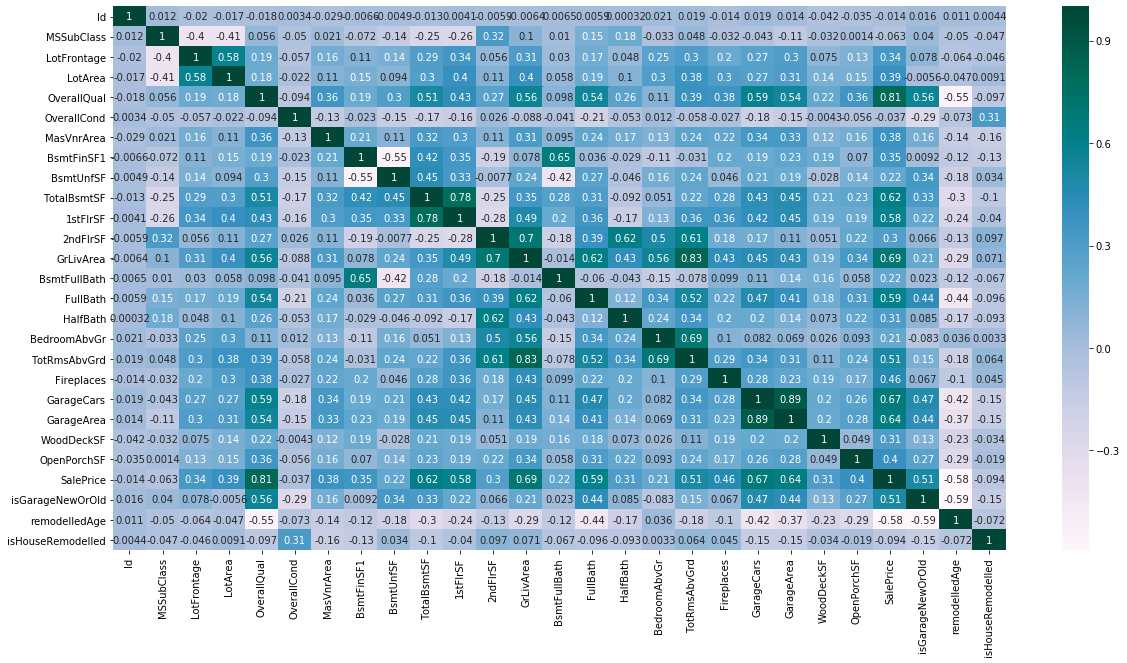

In [155]:
# Check Corrlations for the numerical variables
plt.figure(figsize = (20, 10))
sns.heatmap(house.corr(), annot = True, cmap="PuBuGn")
plt.show()

##### Note: 
##### Garage Cars and Garage Area shows 89% correlation
##### GrLivArea and TotRmsAbvGrd shows 83% correlation


In [156]:
# Remove the highly correlated variables
house.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

## Step 4: Data Preparation 

In [157]:
# Assign the values to the ordered list for easy calculations
house['n_BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house['n_HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['n_KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

house['n_LotShape'] = house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house['n_ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house['n_BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['n_BsmtExposure'] = house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})


house['n_HouseStyle'] = house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house['n_Fence'] = house['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house['n_LotConfig'] = house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house['n_MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house['n_SaleCondition'] = house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})

house['n_FireplaceQu'] = house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['n_GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house['n_BldgType'] = house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,isGarageNewOrOld,remodelledAge,isHouseRemodelled,n_BsmtFinType1,n_HeatingQC,n_KitchenQual,n_LotShape,n_ExterQual,n_BsmtQual,n_BsmtExposure,n_HouseStyle,n_Fence,n_LotConfig,n_MasVnrType,n_SaleCondition,n_FireplaceQu,n_GarageFinish,n_BldgType
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,RFn,2,0,61,None,Normal,12.247699,1,5,0,6,5,4,3,4,4,1,4,0,5,1,1,0,2,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,None,Normal,12.109016,0,31,0,5,5,3,3,3,4,4,1,0,2,0,1,3,2,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,None,Normal,12.317171,1,6,1,6,5,4,2,4,4,2,4,0,5,1,1,3,2,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,None,Abnorml,11.849405,0,36,1,5,4,4,2,3,3,1,4,0,4,0,0,4,1,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,None,Normal,12.429220,1,8,0,6,5,4,2,4,4,3,4,0,2,1,1,3,2,1


In [158]:
# Drop all the columns used above since categorical ordered columns has been converted 
# into derived columns
house = house.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,isGarageNewOrOld,remodelledAge,isHouseRemodelled,n_BsmtFinType1,n_HeatingQC,n_KitchenQual,n_LotShape,n_ExterQual,n_BsmtQual,n_BsmtExposure,n_HouseStyle,n_Fence,n_LotConfig,n_MasVnrType,n_SaleCondition,n_FireplaceQu,n_GarageFinish,n_BldgType
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,1,5,0,6,5,4,3,4,4,1,4,0,5,1,1,0,2,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,5,5,3,3,3,4,4,1,0,2,0,1,3,2,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,6,5,4,2,4,4,2,4,0,5,1,1,3,2,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,0,36,1,5,4,4,2,3,3,1,4,0,4,0,0,4,1,1
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,1,8,0,6,5,4,2,4,4,3,4,0,2,1,1,3,2,1


##### Dummy data creation:

In [159]:

# Create dummies for Exterior2nd
n_Exterior2nd = pd.get_dummies(house['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house = pd.concat([house, n_Exterior2nd], axis = 1)

# Create dummies for Foundation
n_Foundation = pd.get_dummies(house['Foundation'], prefix='Foundation', drop_first = True)
house = pd.concat([house, n_Foundation], axis = 1)

# Create dummies for RoofStyle
n_RoofStyle = pd.get_dummies(house['RoofStyle'], prefix='RoofStyle', drop_first = True)
house = pd.concat([house, n_RoofStyle], axis = 1)

# Create dummies for Exterior1st
n_Exterior1st = pd.get_dummies(house['Exterior1st'], prefix='Exterior1st', drop_first = True)
house = pd.concat([house, n_Exterior1st], axis = 1)

# Create dummies for GarageType
n_GarageType = pd.get_dummies(house['GarageType'], prefix='GarageType', drop_first = True)
house = pd.concat([house, n_GarageType], axis = 1)

# Create dummies for MSZoning
n_MSZoning = pd.get_dummies(house['MSZoning'], prefix='MSZoning', drop_first = True)
house = pd.concat([house, n_MSZoning], axis = 1)

# Create dummies for Neighborhood
n_Neighborhood = pd.get_dummies(house['Neighborhood'], prefix='Neighborhood', drop_first = True)
house = pd.concat([house, n_Neighborhood], axis = 1)

house.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,isGarageNewOrOld,remodelledAge,isHouseRemodelled,n_BsmtFinType1,n_HeatingQC,n_KitchenQual,n_LotShape,n_ExterQual,n_BsmtQual,n_BsmtExposure,n_HouseStyle,n_Fence,n_LotConfig,n_MasVnrType,n_SaleCondition,n_FireplaceQu,n_GarageFinish,n_BldgType,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,1,5,0,6,5,4,3,4,4,1,4,0,5,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,5,5,3,3,3,4,4,1,0,2,0,1,3,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,6,5,4,2,4,4,2,4,0,5,1,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,0,36,1,5,4,4,2,3,3,1,4,0,4,0,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,1,8,0,6,5,4,2,4,4,3,4,0,2,1,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [160]:
# Drop the categorical columns since it has already been derived using dummy variables

house = house.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,isGarageNewOrOld,remodelledAge,isHouseRemodelled,n_BsmtFinType1,n_HeatingQC,n_KitchenQual,n_LotShape,n_ExterQual,n_BsmtQual,n_BsmtExposure,n_HouseStyle,n_Fence,n_LotConfig,n_MasVnrType,n_SaleCondition,n_FireplaceQu,n_GarageFinish,n_BldgType,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,12.247699,1,5,0,6,5,4,3,4,4,1,4,0,5,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,12.109016,0,31,0,5,5,3,3,3,4,4,1,0,2,0,1,3,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,12.317171,1,6,1,6,5,4,2,4,4,2,4,0,5,1,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,11.849405,0,36,1,5,4,4,2,3,3,1,4,0,4,0,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,12.429220,1,8,0,6,5,4,2,4,4,3,4,0,2,1,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


##### Check the final data to be used for Algorithm:

In [161]:
# Display the summary of the columns & data types
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to Neighborhood_Veenker
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


##### Note: The summary of the house dataset shows that all categorical columns has been converted into  numerical columns.


## Step 5: Perform Machine Learning Algorithm 

### a) Perform Train Test Split

In [162]:
# Create Independent variables by dropping dependent variable
X = house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,isGarageNewOrOld,remodelledAge,isHouseRemodelled,n_BsmtFinType1,n_HeatingQC,n_KitchenQual,n_LotShape,n_ExterQual,n_BsmtQual,n_BsmtExposure,n_HouseStyle,n_Fence,n_LotConfig,n_MasVnrType,n_SaleCondition,n_FireplaceQu,n_GarageFinish,n_BldgType,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,1,5,0,6,5,4,3,4,4,1,4,0,5,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,0,31,0,5,5,3,3,3,4,4,1,0,2,0,1,3,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,1,6,1,6,5,4,2,4,4,2,4,0,5,1,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,0,36,1,5,4,4,2,3,3,1,4,0,4,0,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,1,8,0,6,5,4,2,4,4,3,4,0,2,1,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [163]:
# Create dependent variable 'SalePrice'
y = house['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

##### Feature Scaling:

In [164]:
# This is being used for Feature scaling before train test split
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object', length=111)

In [165]:
# Split the data into train and test set
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### b) Recursive Feature Elimination (RFE)

In [166]:
# Recursive Feature elimiation being used to reduce independent variable from 111 to 50
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 50)
rfe = rfe.fit(X_train, y_train)

In [167]:
# Create a datatframe that has 50 features derived using RFE
df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), 
             columns=['Predictors', 'rfe_support', 'Ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df

,Predictors,rfe_support,Ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,BsmtUnfSF,True,1
6,TotalBsmtSF,True,1
7,GrLivArea,True,1
8,FullBath,True,1
9,HalfBath,True,1


In [168]:
df[df['Predictors'] == 'LotArea']

,Predictors,rfe_support,Ranking
1,LotArea,True,1


In [169]:
# Assign 50 columns for X_train and X_test for further analysis
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

X_train = X_train_rfe[X_train_rfe.columns]
X_test = X_test[X_train.columns]


In [170]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'GarageCars', 'WoodDeckSF', 'isGarageNewOrOld',
       'remodelledAge', 'isHouseRemodelled', 'n_HeatingQC', 'n_KitchenQual',
       'n_BsmtExposure', 'n_HouseStyle', 'n_MasVnrType', 'n_SaleCondition',
       'n_FireplaceQu', 'n_BldgType', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'GarageType_CarPort', 'GarageType_None',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neigh

## Step 6: Model Building &  Model Evaluation 

### a) Ridge Regression

In [171]:
# initialize the params
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

ridge_model = GridSearchCV(estimator=ridge,
                          param_grid=params,
                          scoring='neg_mean_absolute_error',
                          cv=5,
                          return_train_score=True,
                          verbose=1)
ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [172]:
# Show the mean results
ridge_results = pd.DataFrame(ridge_model.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha'] < 500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
14,3,-0.075450,-0.081698,1
13,2,-0.075391,-0.081702,2
12,1,-0.075327,-0.081709,3
11,0.9,-0.075321,-0.081713,4
15,4,-0.075504,-0.081715,5
10,0.8,-0.075314,-0.081719,6
9,0.7,-0.075307,-0.081724,7
8,0.6,-0.075300,-0.081730,8
16,5,-0.075555,-0.081735,9
7,0.5,-0.075294,-0.081736,10


##### Plot mean score for train & test :

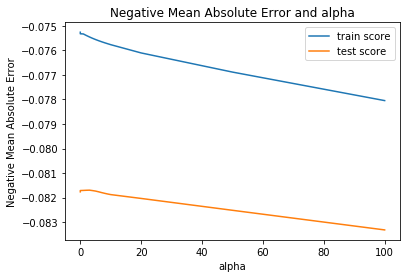

In [173]:
# Plot the mean score for both train and test score
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [174]:
# The below shows the estimator for lamba
ridge_model.best_estimator_

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [175]:
# Get the coefficient value with lambda = 3
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01264955,  0.03103781,  0.07558279,  0.04095436,  0.02093292,
       -0.01981187,  0.06447529,  0.10579078,  0.01493193,  0.01738473,
       -0.01159878,  0.02962933,  0.00985251,  0.01602389, -0.0253241 ,
       -0.01120106,  0.02305352,  0.01722993,  0.01334397,  0.00861316,
        0.0092297 ,  0.0150777 ,  0.0202148 , -0.01189709, -0.00210807,
        0.03311799,  0.01683866, -0.0098887 ,  0.02663721,  0.04395959,
        0.01025929,  0.00940065, -0.02038182,  0.01416176, -0.03615215,
        0.01077496, -0.02219773,  0.00947861, -0.00892256, -0.01339985,
        0.05917912,  0.02847359,  0.09265688,  0.06375369,  0.01804511,
       -0.01015834, -0.00938837,  0.01948135, -0.01974818,  0.02155591])

In [176]:
# Get the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.01651148535406718

In [177]:
# Show the data in dataframe format
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0126
1,LotArea,0.0310
2,OverallQual,0.0756
3,OverallCond,0.0410
4,BsmtFinSF1,0.0209
5,BsmtUnfSF,-0.0198
6,TotalBsmtSF,0.0645
7,GrLivArea,0.1058
8,FullBath,0.0149
9,HalfBath,0.0174


In [178]:
# Convert the features and coefficients into a data dictionary
ridge_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_dict

{'MSSubClass': -0.0126,
 'LotArea': 0.031,
 'OverallQual': 0.0756,
 'OverallCond': 0.041,
 'BsmtFinSF1': 0.0209,
 'BsmtUnfSF': -0.0198,
 'TotalBsmtSF': 0.0645,
 'GrLivArea': 0.1058,
 'FullBath': 0.0149,
 'HalfBath': 0.0174,
 'BedroomAbvGr': -0.0116,
 'GarageCars': 0.0296,
 'WoodDeckSF': 0.0099,
 'isGarageNewOrOld': 0.016,
 'remodelledAge': -0.0253,
 'isHouseRemodelled': -0.0112,
 'n_HeatingQC': 0.0231,
 'n_KitchenQual': 0.0172,
 'n_BsmtExposure': 0.0133,
 'n_HouseStyle': 0.0086,
 'n_MasVnrType': 0.0092,
 'n_SaleCondition': 0.0151,
 'n_FireplaceQu': 0.0202,
 'n_BldgType': -0.0119,
 'Exterior2nd_CBlock': -0.0021,
 'Exterior2nd_CmentBd': 0.0331,
 'Exterior2nd_Wd Sdng': 0.0168,
 'Exterior2nd_Wd Shng': -0.0099,
 'Foundation_CBlock': 0.0266,
 'Foundation_PConc': 0.044,
 'Foundation_Slab': 0.0103,
 'Foundation_Stone': 0.0094,
 'Exterior1st_BrkComm': -0.0204,
 'Exterior1st_BrkFace': 0.0142,
 'Exterior1st_CemntBd': -0.0362,
 'Exterior1st_MetalSd': 0.0108,
 'Exterior1st_Wd Sdng': -0.0222,
 'Exte

##### Repeat the RFE to reduce from 50 to 15 features

In [179]:
# Recursive Feature elimiation being used to reduce independent variable from 50 to 15
X_train_ridge = X_train[ridge_df.Features]

lr = LinearRegression()
lr.fit(X_train_ridge, y_train)

rfe = RFE(lr, 15)
rfe = rfe.fit(X_train_ridge, y_train)

In [180]:
# function to get coefficient values
def convertCoeff(x):
    return ridge_dict[x]

# Assign features that can be used for plotting
df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(convertCoeff)
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(10)
df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.1058
13,MSZoning_RL,True,1,0.0927
1,OverallQual,True,1,0.0756
4,TotalBsmtSF,True,1,0.0645
14,MSZoning_RM,True,1,0.0638
11,MSZoning_FV,True,1,0.0592
10,Foundation_PConc,True,1,0.0440
2,OverallCond,True,1,0.0410
9,Exterior2nd_CmentBd,True,1,0.0331
0,LotArea,True,1,0.0310


##### Plotting the data :

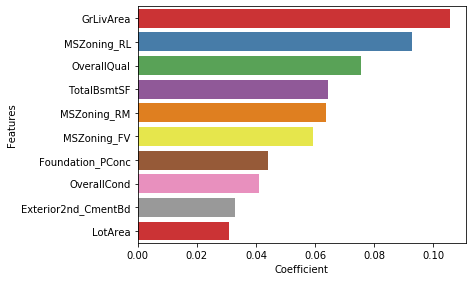

In [181]:
# Plot the data
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = df)
plt.show()

### b) Lasso Regression

In [182]:
# Initializing Lasso regression 
lasso = Lasso()

# Initializing alpha variable
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

lasso_model = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [183]:
# Show the mean results
lasso_results = pd.DataFrame(ridge_model.cv_results_)
lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
14,3,-0.075450,-0.081698,1
13,2,-0.075391,-0.081702,2
12,1,-0.075327,-0.081709,3
11,0.9,-0.075321,-0.081713,4
15,4,-0.075504,-0.081715,5
10,0.8,-0.075314,-0.081719,6
9,0.7,-0.075307,-0.081724,7
8,0.6,-0.075300,-0.081730,8
16,5,-0.075555,-0.081735,9
7,0.5,-0.075294,-0.081736,10


##### Plot mean score for train & test :

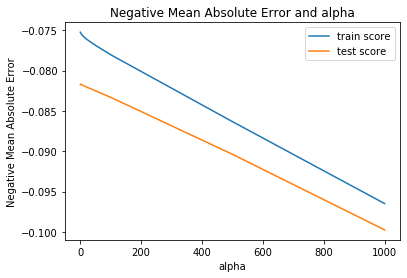

In [184]:
# Plot the mean score for both train and test score

lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')

plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [185]:
# calculate the best estimator for lambda

lasso_model.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [186]:
# check the coefficient values with lambda = 0.001
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01228674,  0.03100726,  0.07575967,  0.04092558,  0.02040043,
       -0.02033438,  0.06470825,  0.10691716,  0.01434439,  0.01694769,
       -0.01187939,  0.02987302,  0.00972062,  0.01609959, -0.02515883,
       -0.01108786,  0.02300736,  0.01693702,  0.01332866,  0.00825896,
        0.00908237,  0.01483504,  0.02002219, -0.01208076, -0.00207905,
        0.03351513,  0.01667938, -0.00980299,  0.02683221,  0.04418683,
        0.01008726,  0.0096799 , -0.02040543,  0.01407228, -0.03652973,
        0.010872  , -0.02215192,  0.00934194, -0.00874009, -0.01320357,
        0.06350336,  0.03054116,  0.10119344,  0.07108193,  0.01779871,
       -0.0101369 , -0.00948938,  0.01943711, -0.01990826,  0.02140928])

In [187]:
# Get the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.01640370563749796

In [188]:
# Show the data in dataframe format
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0123
1,LotArea,0.0310
2,OverallQual,0.0758
3,OverallCond,0.0409
4,BsmtFinSF1,0.0204
5,BsmtUnfSF,-0.0203
6,TotalBsmtSF,0.0647
7,GrLivArea,0.1069
8,FullBath,0.0143
9,HalfBath,0.0169


In [189]:
# Convert the features and coefficients into a data dictionary
lasso_dict = dict(pd.Series(lasso.coef_.round(4), index = X_train.columns))
lasso_dict

{'MSSubClass': -0.0123,
 'LotArea': 0.031,
 'OverallQual': 0.0758,
 'OverallCond': 0.0409,
 'BsmtFinSF1': 0.0204,
 'BsmtUnfSF': -0.0203,
 'TotalBsmtSF': 0.0647,
 'GrLivArea': 0.1069,
 'FullBath': 0.0143,
 'HalfBath': 0.0169,
 'BedroomAbvGr': -0.0119,
 'GarageCars': 0.0299,
 'WoodDeckSF': 0.0097,
 'isGarageNewOrOld': 0.0161,
 'remodelledAge': -0.0252,
 'isHouseRemodelled': -0.0111,
 'n_HeatingQC': 0.023,
 'n_KitchenQual': 0.0169,
 'n_BsmtExposure': 0.0133,
 'n_HouseStyle': 0.0083,
 'n_MasVnrType': 0.0091,
 'n_SaleCondition': 0.0148,
 'n_FireplaceQu': 0.02,
 'n_BldgType': -0.0121,
 'Exterior2nd_CBlock': -0.0021,
 'Exterior2nd_CmentBd': 0.0335,
 'Exterior2nd_Wd Sdng': 0.0167,
 'Exterior2nd_Wd Shng': -0.0098,
 'Foundation_CBlock': 0.0268,
 'Foundation_PConc': 0.0442,
 'Foundation_Slab': 0.0101,
 'Foundation_Stone': 0.0097,
 'Exterior1st_BrkComm': -0.0204,
 'Exterior1st_BrkFace': 0.0141,
 'Exterior1st_CemntBd': -0.0365,
 'Exterior1st_MetalSd': 0.0109,
 'Exterior1st_Wd Sdng': -0.0222,
 'Exte

##### Repeat the RFE to reduce from 50 to 15 features

In [190]:
# Recursive Feature elimiation being used to reduce independent variable from 50 to 15
X_train_lasso = X_train[lasso_df.Features]

lr = LinearRegression()
lr.fit(X_train_lasso, y_train)

rfe = RFE(lr, 15)
rfe = rfe.fit(X_train_lasso, y_train)

In [191]:
# function to get coefficient values
def convertCoeff(x):
    return lasso_dict[x]

# Assign features that can be used for plotting
df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(convertCoeff)
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(10)
df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.1069
13,MSZoning_RL,True,1,0.1012
1,OverallQual,True,1,0.0758
14,MSZoning_RM,True,1,0.0711
4,TotalBsmtSF,True,1,0.0647
11,MSZoning_FV,True,1,0.0635
10,Foundation_PConc,True,1,0.0442
2,OverallCond,True,1,0.0409
9,Exterior2nd_CmentBd,True,1,0.0335
0,LotArea,True,1,0.0310


##### Plotting the data :

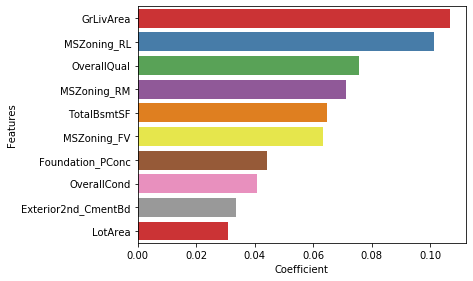

In [192]:
# Plot the data
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = df)
plt.show()

The above graph displays the top **10 predictors** in predicting the house based on **Lasso Regression.**

## Conclusion :

- The optimal lamba value in Ridge & Lasso Regression is follows:
    - Ridge : 3
    - Lasso : 0.001
- The mean squared error in Ridge and Lasso Regression is as follows:
    - Ridge : 0.016349598074551618
    - Lasso : 0.016270889648818582<br>

***The Mean Squared Error values of Lasso is lesser than Ridge model. And, Lasso does the feature reduction which ultimately resulted in better model compared to Ridge.***

#### The significant variables in predicting the price of house are (By Lasso) :-

 1) GrLivArea <br>
 2) OverallQual <br>
 3) TotalBsmtSF <br>
 4) OverallCond <br>
 5) Foundation_PConc <br>
 6) LotArea <br>
 7) GarageCars <br>
 8) MSZoning_FV <br>
 9) MSZoning_RL <br>
10) n_FireplaceQu